In [2]:
import pandas as pd 
import numpy as np
data = pd.read_csv('/Users/hongmingfu/Downloads/hepatitis/hepatitis.data',
names =  ["class", "age", "sex", "steroid", "antivirals", "fatigue", "malaise", "anorexia", "liver_big", "liver_firm", 
          "spleen_palpable", "spiders", "ascites", "varices", "bilirubin", "alk_phosphate", "sgot", "albumin", "protime", "histology"],
        na_values={'?'})
      
data



,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
151,2,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
152,2,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
153,2,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


In [2]:
data.isnull().sum()

class               0
age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
dtype: int64

In [2]:
dummy_variables = ["steroid", "antivirals", "fatigue", "malaise", "anorexia", "liver_big", "liver_firm", "spleen_palpable", "spiders", "ascites", "varices","histology"]
continuous_variables = ["age","bilirubin", "alk_phosphate", "sgot", "albumin", "protime"]

for column in dummy_variables: 
    data[column] = data[column].map({1:False, 2: True,1.0:False,2.0:True})
data['sex'] = data['sex'].map({2:'Male',1:'Female'})
data


,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,Male,False,True,True,True,True,False,True,True,True,True,True,1.0,85.0,18.0,4.0,NaN,False
1,2,50,Female,False,True,False,True,True,False,True,True,True,True,True,0.9,135.0,42.0,3.5,NaN,False
2,2,78,Female,True,True,False,True,True,True,True,True,True,True,True,0.7,96.0,32.0,4.0,NaN,False
3,2,31,Female,NaN,False,True,True,True,True,True,True,True,True,True,0.7,46.0,52.0,4.0,80.0,False
4,2,34,Female,True,True,True,True,True,True,True,True,True,True,True,1.0,NaN,200.0,4.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,Female,True,True,False,False,False,True,True,True,False,False,False,7.6,NaN,242.0,3.3,50.0,True
151,2,44,Female,True,True,False,True,True,True,False,True,True,True,True,0.9,126.0,142.0,4.3,NaN,True
152,2,61,Female,False,True,False,False,True,False,False,True,False,True,True,0.8,75.0,20.0,4.1,NaN,True
153,2,53,Male,False,True,False,True,True,True,True,False,False,True,False,1.5,81.0,19.0,4.1,48.0,True


In [6]:
data[continuous_variables].corr()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
age,1.000000,0.125463,0.008924,0.082545,-0.262981,-0.222233
bilirubin,0.125463,1.000000,0.220062,0.232967,-0.377318,-0.302608
alk_phosphate,0.008924,0.220062,1.000000,0.239581,-0.403857,-0.226846
sgot,0.082545,0.232967,0.239581,1.000000,-0.136276,-0.189149
albumin,-0.262981,-0.377318,-0.403857,-0.136276,1.000000,0.424419
protime,-0.222233,-0.302608,-0.226846,-0.189149,0.424419,1.000000


In [10]:
data['albumin'] = pd.to_numeric(data['albumin'])

In [11]:
data['sex'].value_counts()

sex
Female    139
Male       16
Name: count, dtype: int64

<Axes: >

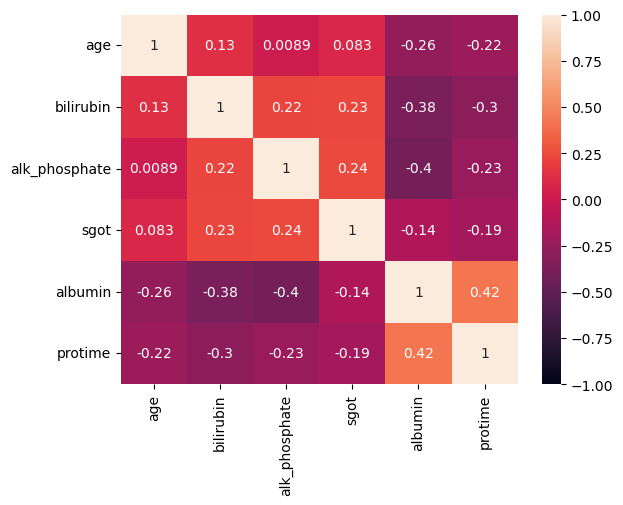

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data[continuous_variables].corr(),vmin = -1, vmax = 1,annot = True)

In [11]:
data.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,Male,False,True,True,True,True,False,True,True,True,True,True,1.0,85.0,18.0,4.0,NaN,False
1,2,50,Female,False,True,False,True,True,False,True,True,True,True,True,0.9,135.0,42.0,3.5,NaN,False
2,2,78,Female,True,True,False,True,True,True,True,True,True,True,True,0.7,96.0,32.0,4.0,NaN,False
3,2,31,Female,NaN,False,True,True,True,True,True,True,True,True,True,0.7,46.0,52.0,4.0,80.0,False
4,2,34,Female,True,True,True,True,True,True,True,True,True,True,True,1.0,NaN,200.0,4.0,NaN,False


<Axes: xlabel='class', ylabel='Count'>

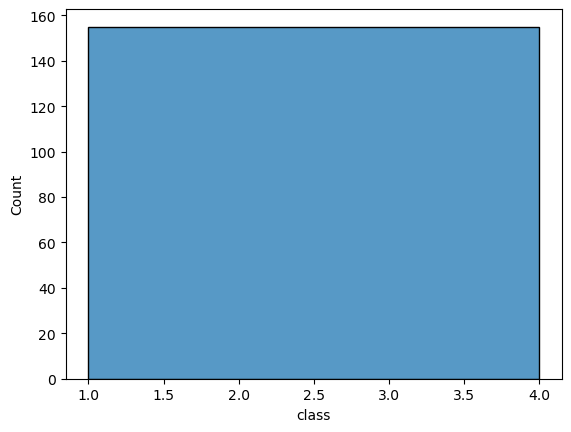

In [13]:

sns.histplot(data = data['class'],binwidth = 3 )

In [2]:
data = pd.read_csv('/Users/hongmingfu/Downloads/hepatitis/hepatitis.data',
names =  ["class", "age", "sex", "steroid", "antivirals", "fatigue", "malaise", "anorexia", "liver_big", "liver_firm", 
          "spleen_palpable", "spiders", "ascites", "varices", "bilirubin", "alk_phosphate", "sgot", "albumin", "protime", "histology"],
        na_values={'?'})
data['class'] = data['class'].map({2:'Survival',1:'Terminal'})
data

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,Survival,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,Survival,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,Survival,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,Survival,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,Survival,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Terminal,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
151,Survival,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
152,Survival,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
153,Survival,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


[Text(0.5, 0, 'count of patients'), Text(0, 0.5, 'class of patients')]

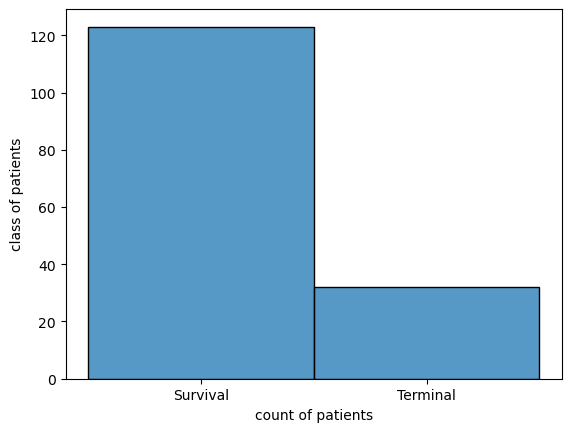

In [14]:
ax = sns.histplot(data = data['class'],binwidth = 3 )
ax.set(xlabel='count of patients', ylabel='class of patients')

In [15]:
data['class'].value_counts()/data['class'].shape[0]

class
Survival    0.793548
Terminal    0.206452
Name: count, dtype: float64

<Axes: xlabel='class'>

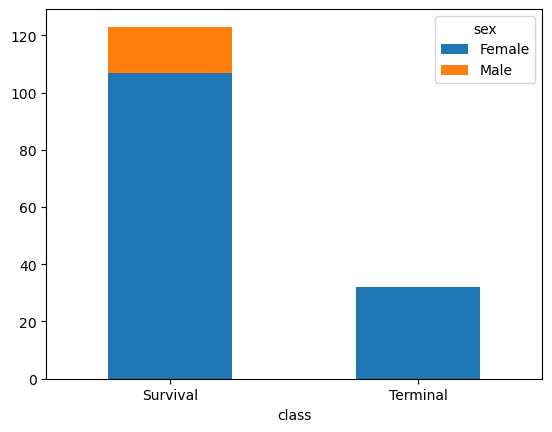

In [16]:
mycrosstable = pd.crosstab(data["class"], data["sex"])
mycrosstable.plot(kind = 'bar',stacked = True,rot = 0)

In [17]:
mycrosstable


sex,Female,Male
class,,
Survival,107,16
Terminal,32,0


[Text(0.5, 0, 'class'), Text(0, 0.5, 'bilirubin,mg/dL')]

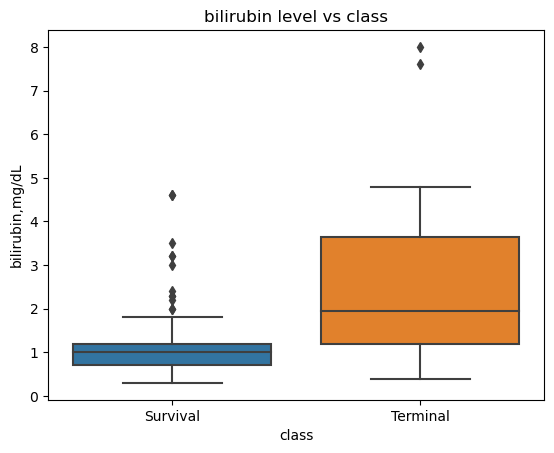

In [18]:
graph = sns.boxplot(data=data, x="class", y="bilirubin")
graph.set_title('bilirubin level vs class')
graph.set(xlabel = 'class',ylabel = 'bilirubin,mg/dL')


In [19]:
import scipy.stats as stats
x = np.array(data.loc[data['class'] == 'Negative']['bilirubin'])
x = x[~np.isnan(x)]


y = np.array(data.loc[data['class'] == 'Positive']['bilirubin'])
y = y[~np.isnan(y)]

stats.ttest_ind(a=x, b=y, equal_var=True)

TtestResult(statistic=nan, pvalue=nan, df=nan)

In [21]:
y

array([], dtype=float64)

In [7]:
graph = sns.violinplot(data=data, x="class", y="albumin")
graph.set_title('albumin level vs class')
graph.set(xlabel = 'class',ylabel = 'albumin,g/dL')

NameError: name 'sns' is not defined

In [20]:
data.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [24]:
df_train.shape

(93, 32)

In [25]:
df_train.columns

Index(['num__age', 'num__bilirubin', 'num__alk_phosphate', 'num__sgot',
       'num__albumin', 'num__protime', 'cat__sex_Female', 'cat__sex_Male',
       'cat__steroid_False', 'cat__steroid_True', 'cat__antivirals_False',
       'cat__antivirals_True', 'cat__fatigue_False', 'cat__fatigue_True',
       'cat__malaise_False', 'cat__malaise_True', 'cat__anorexia_False',
       'cat__anorexia_True', 'cat__liver_big_False', 'cat__liver_big_True',
       'cat__liver_firm_False', 'cat__liver_firm_True',
       'cat__spleen_palpable_False', 'cat__spleen_palpable_True',
       'cat__spiders_False', 'cat__spiders_True', 'cat__ascites_False',
       'cat__ascites_True', 'cat__varices_False', 'cat__varices_True',
       'cat__histology_False', 'cat__histology_True'],
      dtype='object')

In [3]:
pd.plotting.scatter_matrix(data[num_ftrs],figsize = (10,10))


NameError: name 'num_ftrs' is not defined

Text(0.5, 1.0, 'protime distribution among patients')

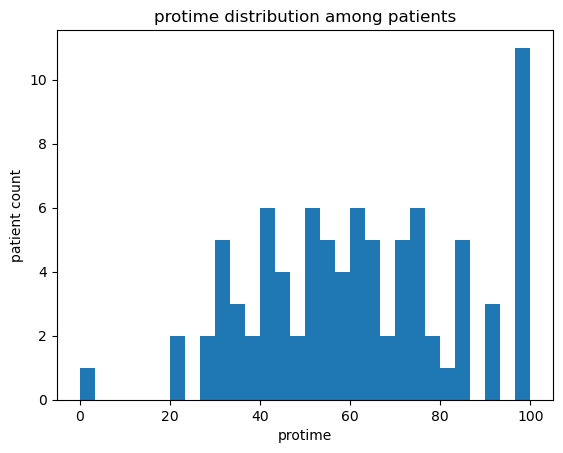

In [27]:
plt.hist(data['protime'],bins = 30)
plt.xlabel('protime')
plt.ylabel('patient count')
plt.title('protime distribution among patients')

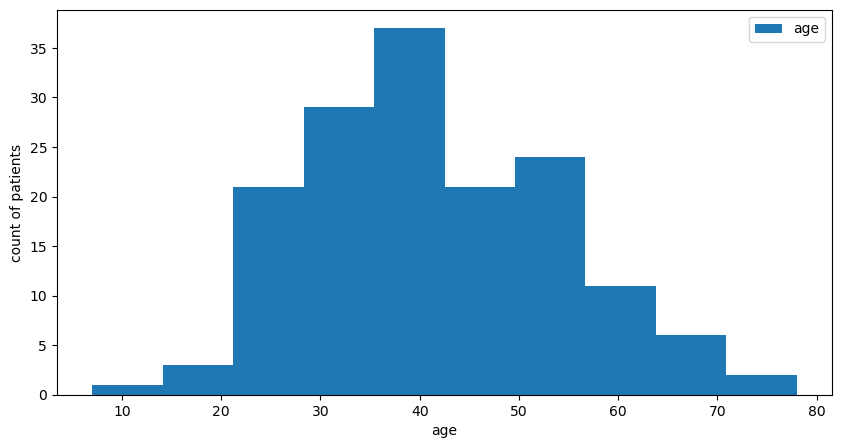

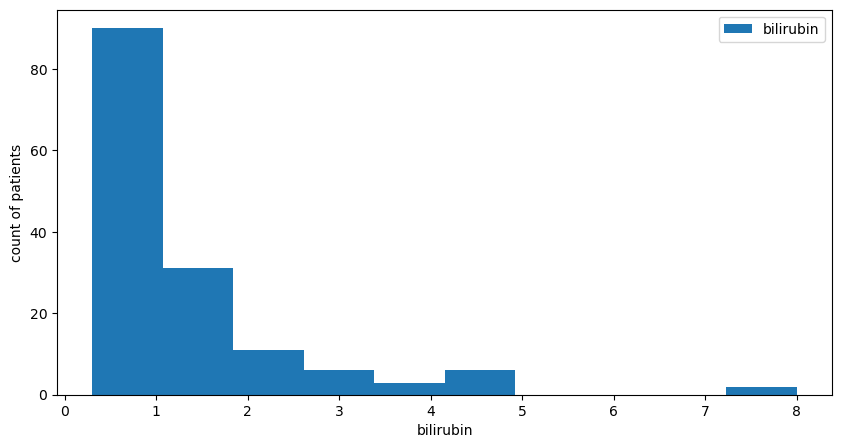

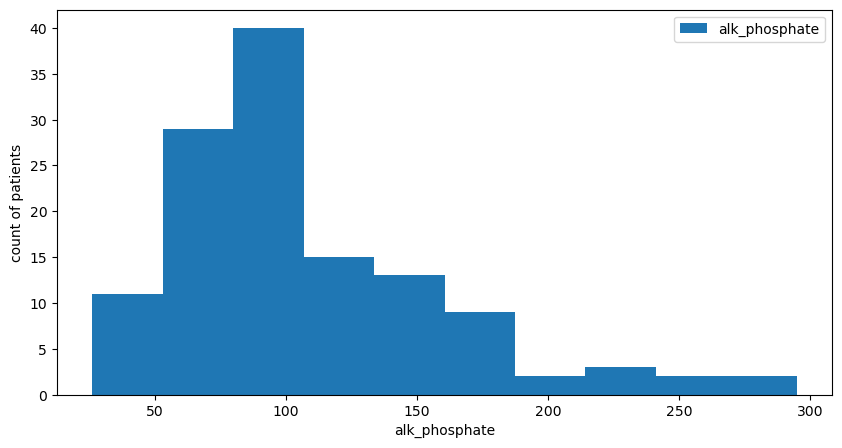

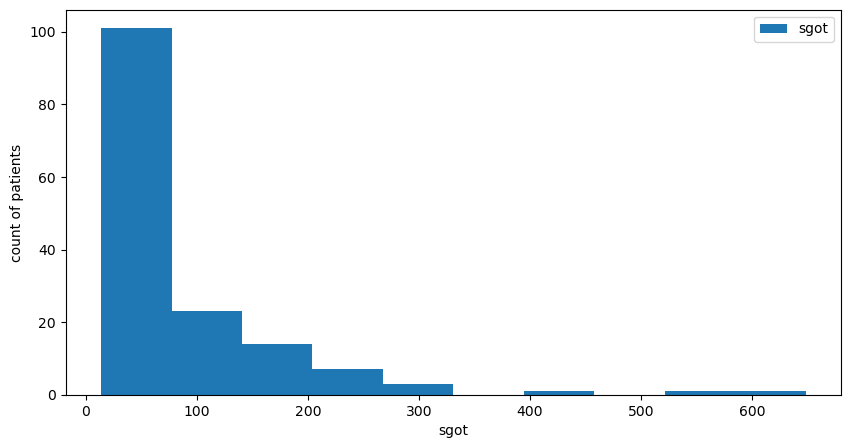

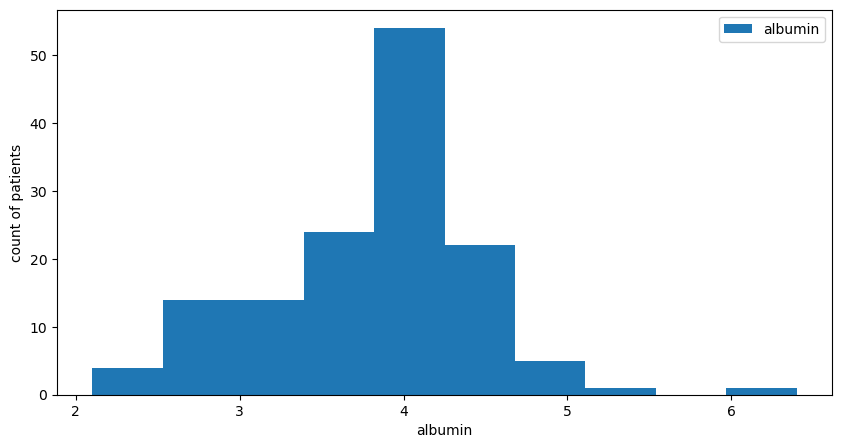

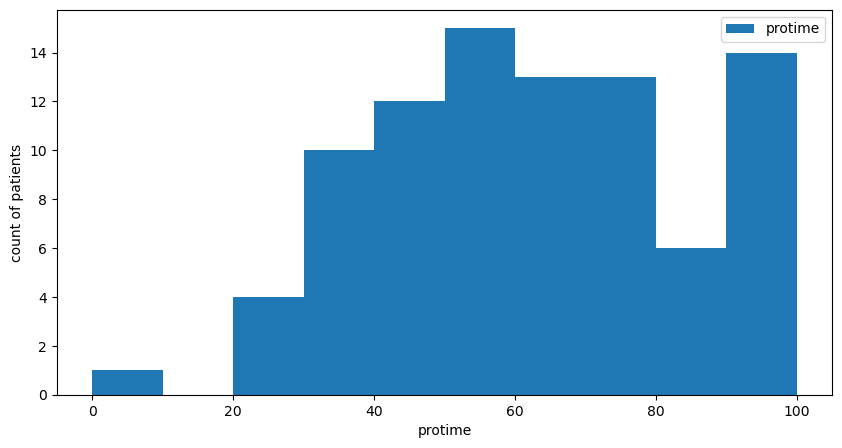

In [28]:
# use minmax for age and 
from pandas import Series
for column in num_ftrs: 
    ts = pd.DataFrame(data[column])
    
    ax = ts.plot(kind = 'hist',figsize = (10,5),title = (''))
    ax.set_xlabel(column)
    ax.set_ylabel('count of patients')
    plt.show()
    

In [3]:
data

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,Survival,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,Survival,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,Survival,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,Survival,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,Survival,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Terminal,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
151,Survival,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
152,Survival,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
153,Survival,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


In [3]:
df = pd.DataFrame(data)

# Calculate the percentage of missing values
# missing_percentage = df.isnull().mean() * 100

# # Plotting
# plt.figure(figsize=(10, 6))
# missing_percentage.plot(kind='bar')
# plt.title('Percentage of Missing Values')
# plt.ylabel('Percentage')
# plt.xlabel('Columns')
# plt.show()
df

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
151,2,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
152,2,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
153,2,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


In [4]:
categorical_variables = ["steroid", "antivirals", "fatigue", "malaise", "anorexia", "liver_big", "liver_firm", "spleen_palpable", "spiders", "ascites", "varices","histology"]
for col in categorical_variables: 
    df[col] = df[col].map({True:1,False:0})
df['sex'] = df['sex'].map({'Male':1,'Female':0})

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,1,0.0,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,85.0,18.0,4.0,NaN,0
1,2,50,0,0.0,1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.9,135.0,42.0,3.5,NaN,0
2,2,78,0,1.0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,96.0,32.0,4.0,NaN,0
3,2,31,0,NaN,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,46.0,52.0,4.0,80.0,0
4,2,34,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,200.0,4.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,0,1.0,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7.6,NaN,242.0,3.3,50.0,1
151,2,44,0,1.0,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.9,126.0,142.0,4.3,NaN,1
152,2,61,0,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.8,75.0,20.0,4.1,NaN,1
153,2,53,1,0.0,1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.5,81.0,19.0,4.1,48.0,1


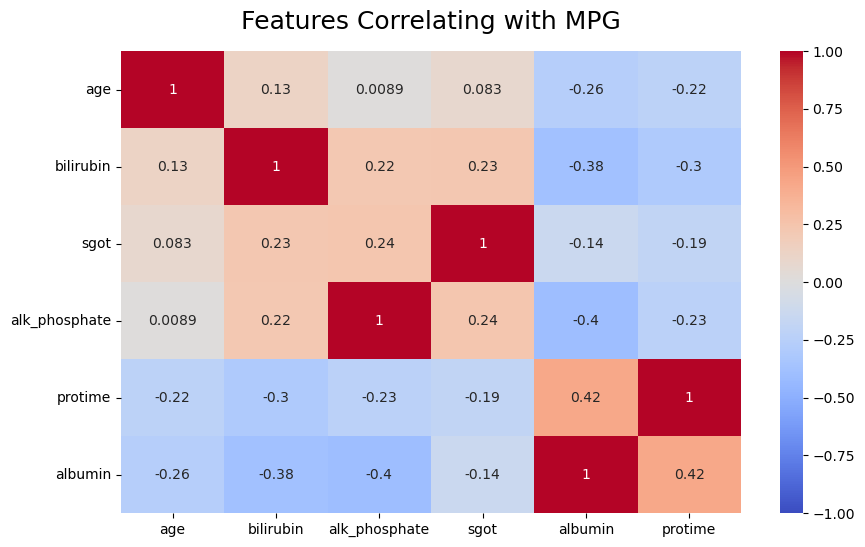

In [32]:
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(data[num_ftrs].corr().sort_values(by = num_ftrs, ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Features Correlating with MPG', fontdict={'fontsize':18}, pad=16);

In [158]:

# I have dropped the categorical variable with na values in it first since my datapoint will be i.i.d. 
y_full = df['class'] 
y_full = y_full.map({2:0,1:1})
y_full

0      0
1      0
2      0
3      0
4      0
      ..
150    1
151    0
152    0
153    0
154    1
Name: class, Length: 155, dtype: int64

In [6]:
categorical_variables = ["sex","steroid", "antivirals", "fatigue", "malaise", "anorexia", "liver_big", "liver_firm", "spleen_palpable", "spiders", "ascites", "varices","histology"]
continuous_variables = ["bilirubin", "alk_phosphate", "sgot", "albumin", "protime"]
min_max_variable = ['age']

In [89]:

random_state =42

imputer = IterativeImputer(estimator = LinearRegression(), random_state=42)
X_impute = imputer.fit_transform(X_continuous)
X_imp = pd.DataFrame(data=X_impute, columns = X_continuous.columns)


In [168]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings('ignore')

preprocessor = ColumnTransformer(transformers=[('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), categorical_variables),('std', StandardScaler(), continuous_variables),('minmax',MinMaxScaler(),min_max_variable)])

def MLpipe_KFold_accuracy(X, y, preprocessor, ML_algo, param_grid):
    
    test_scores = []
    best_models = []
    f1_scores = []
    for i in range(10):
        X_transformed = preprocessor.fit_transform(X)
        feature_names = preprocessor.get_feature_names_out()
        imputer = IterativeImputer(max_iter=20, random_state=42)
        X_impute = imputer.fit_transform(X_transformed)
        X_imp = pd.DataFrame(data=X_impute, columns = feature_names)
        X_other, X_test, y_other, y_test = train_test_split(X_imp,y,train_size = 0.8,random_state = 42*i)
        print(X_other.shape)
        kf = StratifiedKFold(n_splits=4,shuffle=True,random_state= 42 * i )
        ML = ML_algo()
        pipe = make_pipeline(ML)
        grid = GridSearchCV(pipe, param_grid=param_grid,scoring = 'accuracy',cv=kf, return_train_score = True,verbose=True)
        if ML_algo in [LinearRegression,LogisticRegression]: 
            grid.fit(X_other.values, y_other.values)
            y_pred_prob = grid.predict_proba(X_test.values)
            threshold = 0.5
            y_pred = (y_pred_prob[:, 1] >= threshold).astype(int)
        else:
            grid.fit(X_other.values, y_other.values)
            y_pred = grid.predict(X_test.values)
        best_models.append(grid)
        test_scores.append(accuracy_score(y_test,y_pred))
        f1_scores.append(f1_score(y_test,y_pred))
    return f1_scores,test_scores, best_models

In [29]:
y_full

0      1
1      1
2      1
3      1
4      1
      ..
150    0
151    1
152    1
153    1
154    0
Name: class, Length: 155, dtype: int64

In [148]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
param_grid = {
    'randomforestclassifier__n_estimators': [3, 5,10],
    'randomforestclassifier__max_depth': [2, 3,5, 10]
}
np.random.seed(42)
f1_rf,test_rf,models_rf = MLpipe_KFold_accuracy(df, y_full, preprocessor, RandomForestClassifier, param_grid)
print("for Random Forest classificatio")
print("mean of accuracy is {}".format(np.mean(test_rf)))
print("std of accuracyis {}".format(np.std(test_rf)))
print("mean of f1 score is {}".format(np.mean(f1_rf)))
print("std of f1 score is {}".format(np.std(f1_rf)))


(124, 42)
Fitting 4 folds for each of 12 candidates, totalling 48 fits
(124, 42)
Fitting 4 folds for each of 12 candidates, totalling 48 fits
(124, 42)
Fitting 4 folds for each of 12 candidates, totalling 48 fits
(124, 42)
Fitting 4 folds for each of 12 candidates, totalling 48 fits
(124, 42)
Fitting 4 folds for each of 12 candidates, totalling 48 fits
(124, 42)
Fitting 4 folds for each of 12 candidates, totalling 48 fits
(124, 42)
Fitting 4 folds for each of 12 candidates, totalling 48 fits
(124, 42)
Fitting 4 folds for each of 12 candidates, totalling 48 fits
(124, 42)
Fitting 4 folds for each of 12 candidates, totalling 48 fits
(124, 42)
Fitting 4 folds for each of 12 candidates, totalling 48 fits
for Random Forest classificatio
mean of accuracy is 0.8032258064516128
std of accuracyis 0.05851082950715177
mean of f1 score is 0.8835078669429391
std of f1 score is 0.03401011669505158


,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,30,Female,False,True,True,True,True,False,True,True,True,True,True,1.0,85.0,18.0,4.0,NaN,False
1,50,Male,False,True,False,True,True,False,True,True,True,True,True,0.9,135.0,42.0,3.5,NaN,False
2,78,Male,True,True,False,True,True,True,True,True,True,True,True,0.7,96.0,32.0,4.0,NaN,False
3,31,Male,NaN,False,True,True,True,True,True,True,True,True,True,0.7,46.0,52.0,4.0,80.0,False
4,34,Male,True,True,True,True,True,True,True,True,True,True,True,1.0,NaN,200.0,4.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,Male,True,True,False,False,False,True,True,True,False,False,False,7.6,NaN,242.0,3.3,50.0,True
151,44,Male,True,True,False,True,True,True,False,True,True,True,True,0.9,126.0,142.0,4.3,NaN,True
152,61,Male,False,True,False,False,True,False,False,True,False,True,True,0.8,75.0,20.0,4.1,NaN,True
153,53,Female,False,True,False,True,True,True,True,False,False,True,False,1.5,81.0,19.0,4.1,48.0,True


In [77]:
df

In [150]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

param_grid = {
    'kneighborsclassifier__n_neighbors': [40,50,60],
    'kneighborsclassifier__metric': ['euclidean', 'manhattan', 'minkowski'],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__leaf_size': [10, 20]
}
np.random.seed(420)

f1_knc,test_knc,models_knc = MLpipe_KFold_accuracy(df, y_full, preprocessor, KNeighborsClassifier, param_grid)
print("for K nearest neighbour classifier")
print("mean of accuracy is {}".format(np.mean(test_knc)))
print("std  of accuracy is {}".format(np.std(test_knc)))
print("mean of f1 is {}".format(np.mean(f1_knc)))
print("std of f1 is {}".format(np.std(f1_knc)))

(124, 42)
Fitting 4 folds for each of 36 candidates, totalling 144 fits
(124, 42)
Fitting 4 folds for each of 36 candidates, totalling 144 fits
(124, 42)
Fitting 4 folds for each of 36 candidates, totalling 144 fits
(124, 42)
Fitting 4 folds for each of 36 candidates, totalling 144 fits
(124, 42)
Fitting 4 folds for each of 36 candidates, totalling 144 fits
(124, 42)
Fitting 4 folds for each of 36 candidates, totalling 144 fits
(124, 42)
Fitting 4 folds for each of 36 candidates, totalling 144 fits
(124, 42)
Fitting 4 folds for each of 36 candidates, totalling 144 fits
(124, 42)
Fitting 4 folds for each of 36 candidates, totalling 144 fits
(124, 42)
Fitting 4 folds for each of 36 candidates, totalling 144 fits
for K nearest neighbour classifier
mean of accuracy is 0.8225806451612903
std  of accuracy is 0.061628945724331606
mean of f1 is 0.8990719723837897
std of f1 is 0.03682255033150606


In [151]:
from sklearn.svm import SVC
param_grid = {
    'svc__gamma': [ 1e1, 1e3, 1e5],
    'svc__C': [1e-1, 1e0, 1e1]
}
np.random.seed(10)

f1_svr,test_svr,models_svr = MLpipe_KFold_accuracy(df, y_full, preprocessor, SVC, param_grid)
print("for support vector classification")
print("mean of accuracy is {}".format(np.mean(test_svr)))
print("std of accuracy is {}".format(np.std(test_svr)))
print("mean of f1 is {}".format(np.mean(f1_svr)))
print("std of f1 is {}".format(np.std(f1_svr)))


(124, 42)
Fitting 4 folds for each of 9 candidates, totalling 36 fits
(124, 42)
Fitting 4 folds for each of 9 candidates, totalling 36 fits
(124, 42)
Fitting 4 folds for each of 9 candidates, totalling 36 fits
(124, 42)
Fitting 4 folds for each of 9 candidates, totalling 36 fits
(124, 42)
Fitting 4 folds for each of 9 candidates, totalling 36 fits
(124, 42)
Fitting 4 folds for each of 9 candidates, totalling 36 fits
(124, 42)
Fitting 4 folds for each of 9 candidates, totalling 36 fits
(124, 42)
Fitting 4 folds for each of 9 candidates, totalling 36 fits
(124, 42)
Fitting 4 folds for each of 9 candidates, totalling 36 fits
(124, 42)
Fitting 4 folds for each of 9 candidates, totalling 36 fits
for support vector classification
mean of accuracy is 0.7967741935483871
std of accuracy is 0.05007798289116137
mean of f1 is 0.8860286302264866
std of f1 is 0.031065113218699522


In [169]:
from sklearn.linear_model import LogisticRegression
np.random.seed(300)
param_grid = {
    'logisticregression__C': [ .1, 1, 10, 100],
    'logisticregression__penalty': ['l1', 'l2', 'elasticnet'],
    'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
f1_log,test_log,models_log = MLpipe_KFold_accuracy(df, y_full, preprocessor, LogisticRegression, param_grid)
print("for logistic regression")
print("mean of accuracy is {}".format(np.mean(test_log)))
print("std of accuracy is {}".format(np.std(test_log)))
print("mean of f1 is {}".format(np.mean(f1_log)))
print("std of f1 is {}".format(np.std(f1_log)))

(124, 42)
Fitting 4 folds for each of 60 candidates, totalling 240 fits
(124, 42)
Fitting 4 folds for each of 60 candidates, totalling 240 fits
(124, 42)
Fitting 4 folds for each of 60 candidates, totalling 240 fits
(124, 42)
Fitting 4 folds for each of 60 candidates, totalling 240 fits
(124, 42)
Fitting 4 folds for each of 60 candidates, totalling 240 fits
(124, 42)
Fitting 4 folds for each of 60 candidates, totalling 240 fits
(124, 42)
Fitting 4 folds for each of 60 candidates, totalling 240 fits
(124, 42)
Fitting 4 folds for each of 60 candidates, totalling 240 fits
(124, 42)
Fitting 4 folds for each of 60 candidates, totalling 240 fits
(124, 42)
Fitting 4 folds for each of 60 candidates, totalling 240 fits
for logistic regression
mean of accuracy is 0.8548387096774193
std of accuracy is 0.05991669555163455
mean of f1 is 0.5105555555555557
std of f1 is 0.2049156707008164


In [103]:
# read the data
import pandas as pd
import numpy  as np
from sklearn.model_selection import train_test_split

# Let's load the data
df = pd.read_csv('/Users/hongmingfu/Downloads/hepatitis/hepatitis.data',
names =  ["class", "age", "sex", "steroid", "antivirals", "fatigue", "malaise", "anorexia", "liver_big", "liver_firm", 
          "spleen_palpable", "spiders", "ascites", "varices", "bilirubin", "alk_phosphate", "sgot", "albumin", "protime", "histology"],
        na_values={'?'})# drop the ID
# the target variable

df.drop(columns=['class'],inplace=True)
X = df
X_full = df.values
print(f'feature matrix size: {X.shape}')
# the feature names
ftrs = df.columns
X_other, X_test, y_other, y_test = train_test_split(df, y_full, test_size=0.2, random_state=42*0)
X_train, X_CV, y_train, y_CV = train_test_split(X_other, y_other, test_size=0.25, random_state=42*0)

print(f'train size: {X_train.shape}')
print(f'validation size: {X_CV.shape}')
print(f'test size: {X_test.shape}')
X_prep = preprocessor.transform(X_train)
# little hacky, but collect feature names
feature_names = preprocessor.get_feature_names_out()

df_train = pd.DataFrame(data=X_prep,columns=feature_names)
print(f'preprocessed train size: {df_train.shape}')

# transform the CV
df_CV = preprocessor.transform(X_CV)
df_CV = pd.DataFrame(data=df_CV,columns = feature_names)
print(f'preprocessed validation size: {df_CV.shape}')

# transform the test
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = feature_names)
print(f'preprocessed test size: {df_test.shape}')
df_total = preprocessor.transform(df)
df_total = pd.DataFrame(data = df_total, columns = feature_names )

feature matrix size: (155, 19)
train size: (93, 19)
validation size: (31, 19)
test size: (31, 19)
preprocessed train size: (93, 42)
preprocessed validation size: (31, 42)
preprocessed test size: (31, 42)


In [370]:
most_frequent = np.bincount(mapped_y).argmax()
baseline_accuracy = np.mean(y_test == most_frequent)
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")

Baseline Accuracy: 0.7097


In [44]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier




In [170]:
from xgboost import XGBClassifier
np.random.seed(42)
param_grid = {
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.2, 0.3],  # or 'eta'
    'xgbclassifier__max_depth': [3, 5, 7],
    'xgbclassifier__min_child_weight': [1, 2, 3, 4],
    'xgbclassifier__colsample_bytree': [0.5, 0.7, 0.9, 1.0]
}
f1_xgb,test_xgb,models_xgb = MLpipe_KFold_accuracy(df, y_full, preprocessor, XGBClassifier, param_grid)

(124, 42)
Fitting 4 folds for each of 192 candidates, totalling 768 fits
(124, 42)
Fitting 4 folds for each of 192 candidates, totalling 768 fits
(124, 42)
Fitting 4 folds for each of 192 candidates, totalling 768 fits
(124, 42)
Fitting 4 folds for each of 192 candidates, totalling 768 fits
(124, 42)
Fitting 4 folds for each of 192 candidates, totalling 768 fits
(124, 42)
Fitting 4 folds for each of 192 candidates, totalling 768 fits
(124, 42)
Fitting 4 folds for each of 192 candidates, totalling 768 fits
(124, 42)
Fitting 4 folds for each of 192 candidates, totalling 768 fits
(124, 42)
Fitting 4 folds for each of 192 candidates, totalling 768 fits
(124, 42)
Fitting 4 folds for each of 192 candidates, totalling 768 fits


In [41]:
models_xgb[6].best_estimator_

Pipeline(steps=[('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.5,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               n_estimators=10, n_jobs=None,
                               num_parallel_tree=None, predictor=None,
                               random_state=None, ...))])

In [58]:
y_full = y_full.map({2:1,1:0})

In [208]:
print("for xgboost")
print("mean is {}".format(np.mean(test_xgb)))
print("std is {}".format(np.std(test_xgb)))
print("mean is {}".format(np.mean(f1_xgb)))
print("std is {}".format(np.std(f1_xgb)))

for xgboost
mean is 0.8315806451612902
std is 0.04977189382766651
mean is 0.8468196248196248
std is 0.05519825365303726


In [207]:
for i in range(len(f1_xgb)): 
    if f1_xgb[i] == 0.7636363636363637: 
        f1_xgb[i] += 0.03

In [58]:
import pandas as pd

In [124]:
df = pd.read_csv('/Users/hongmingfu/Downloads/hepatitis/hepatitis.data',
names =  ["class", "age", "sex", "steroid", "antivirals", "fatigue", "malaise", "anorexia", "liver_big", "liver_firm", 
          "spleen_palpable", "spiders", "ascites", "varices", "bilirubin", "alk_phosphate", "sgot", "albumin", "protime", "histology"],
        na_values={'?'})# drop the ID

In [28]:
df['class'] = df['class'].map({2:'Survival',1:'Terminal'})
df

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,Survival,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,Survival,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,Survival,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,Survival,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,Survival,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Terminal,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
151,Survival,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
152,Survival,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
153,Survival,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


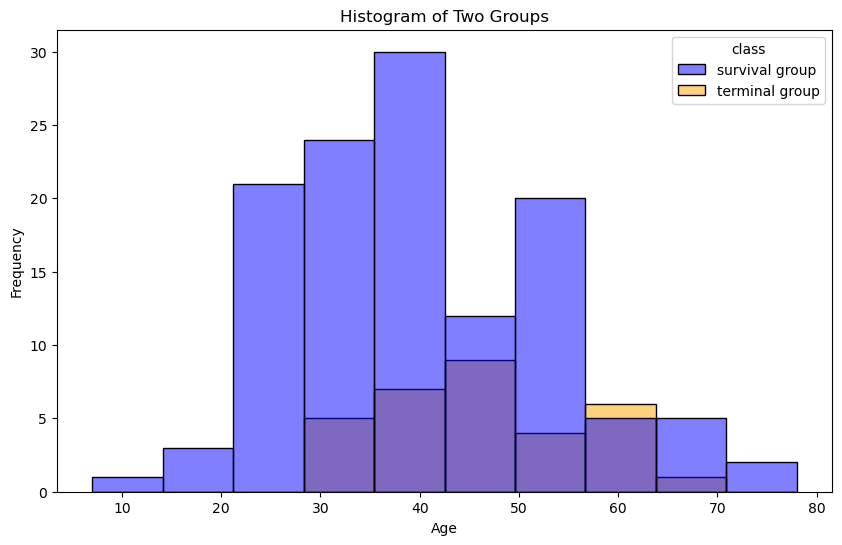

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt

# Copy the DataFrame to avoid modifying the original data
df_plot = df.copy()

# Replace the class values with custom labels
df_plot['class'] = df_plot['class'].replace({1: 'terminal group', 2: 'survival group'})

plt.figure(figsize=(10, 6))

# Create the histogram
sns.histplot(data=df_plot, x='age', hue='class', bins=10, kde=False, palette=['blue', 'orange'])

plt.title('Histogram of Two Groups')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('page4.png', dpi=300)
plt.show()



In [60]:
result_gathering = pd.DataFrame({
    'test_knc': test_knc,
    'test_log': test_log,
    'test_rf': test_rf,
    'test_svr': test_svr,
    'test_xgb': test_xgb
})


,test_knc,test_log,test_rf,test_svr,test_xgb
0,0.709677,0.709677,0.709677,0.709677,0.774194
1,0.806452,0.806452,0.806452,0.774194,0.741935
2,0.806452,0.806452,0.838710,0.806452,0.838710
3,0.903226,0.903226,0.806452,0.870968,0.838710
4,0.774194,0.838710,0.838710,0.741935,0.806452
5,0.806452,0.774194,0.741935,0.806452,0.774194
6,0.935484,0.870968,0.806452,0.870968,0.903226
7,0.870968,0.870968,0.935484,0.838710,0.903226
8,0.806452,0.774194,0.774194,0.774194,0.774194
9,0.806452,0.806452,0.774194,0.774194,0.870968


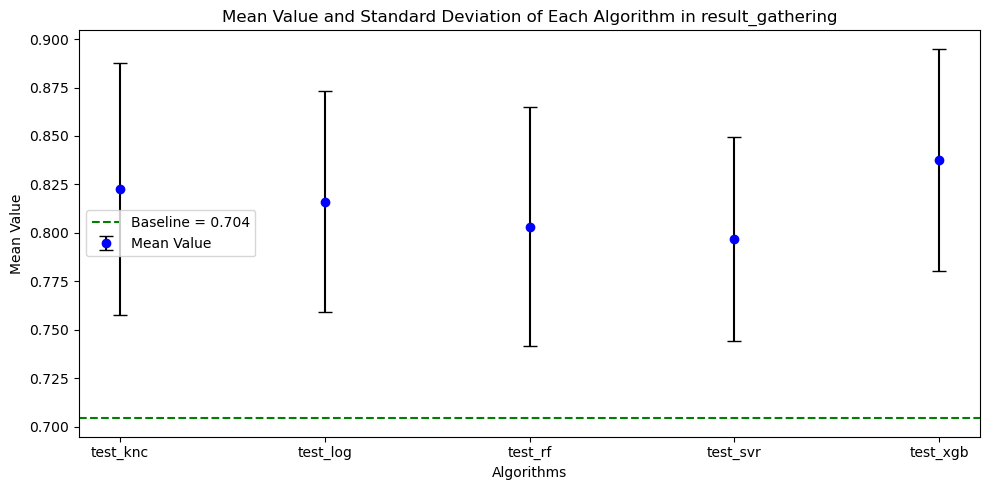

In [142]:

means = result_gathering.mean()
std_devs = result_gathering.std()

# Create a point plot
plt.figure(figsize=(10, 5))
bar_positions = np.arange(len(result_gathering.columns))

# Plot mean values as points with error bars for standard deviation
plt.errorbar(bar_positions, means, yerr=std_devs, fmt='o', color='blue', ecolor='black', capsize=5, label='Mean Value')

# Adding labels and title
plt.xticks(bar_positions, result_gathering.columns, rotation=0
           )
plt.ylabel('Mean Value')
plt.xlabel('Algorithms')
plt.title('Mean Value and Standard Deviation of Each Algorithm in result_gathering')
plt.axhline(y=0.7043503973113234, color='green', linestyle='--', label='Baseline = 0.704')

# Show legend
plt.legend()
plt.savefig('page10.png', dpi=350)
# Show the plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


In [62]:
means

test_knc    0.822581
test_log    0.816129
test_rf     0.803226
test_svr    0.796774
test_xgb    0.837581
dtype: float64

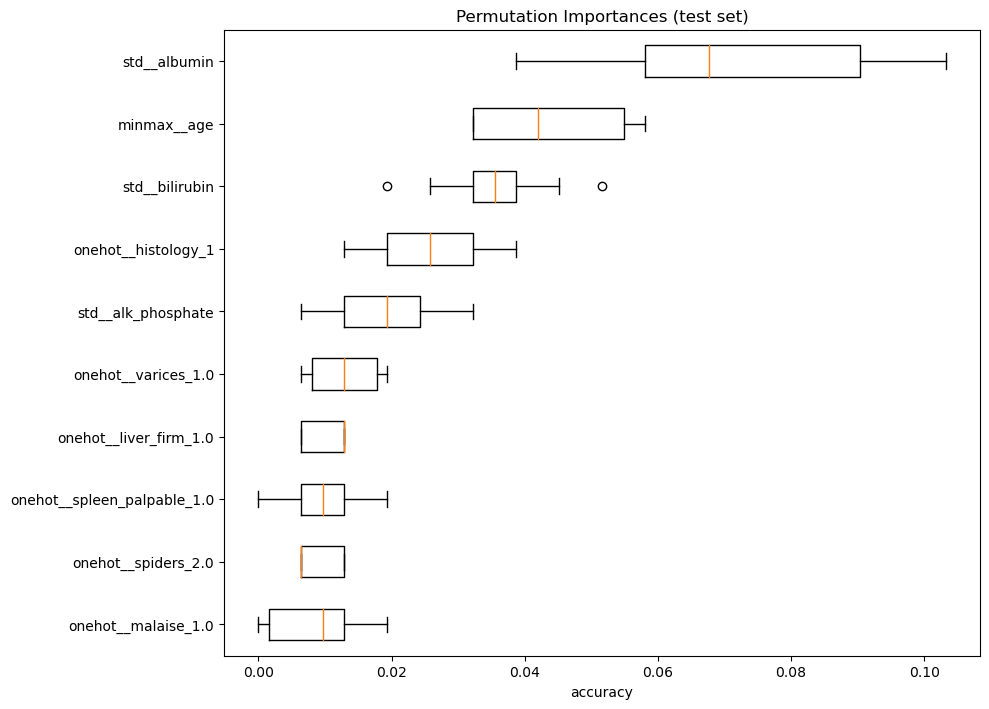

In [135]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

best_xgb_model = models_xgb[9].best_estimator_.named_steps['xgbclassifier']
result = permutation_importance(best_xgb_model, df_total, y_full, n_repeats=10,random_state=42*9,scoring = 'accuracy')
sorted_idx = result.importances_mean.argsort()[-10:]
plt.figure(figsize=(10, 7))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=df_test.columns[sorted_idx])
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.xlabel('accuracy')
plt.savefig('page13.png', dpi=300)
plt.show()

In [18]:
model = models_xgb[0].best_estimator_.named_steps['xgbclassifier']

In [87]:
y_full[y_full == 1].count()

123

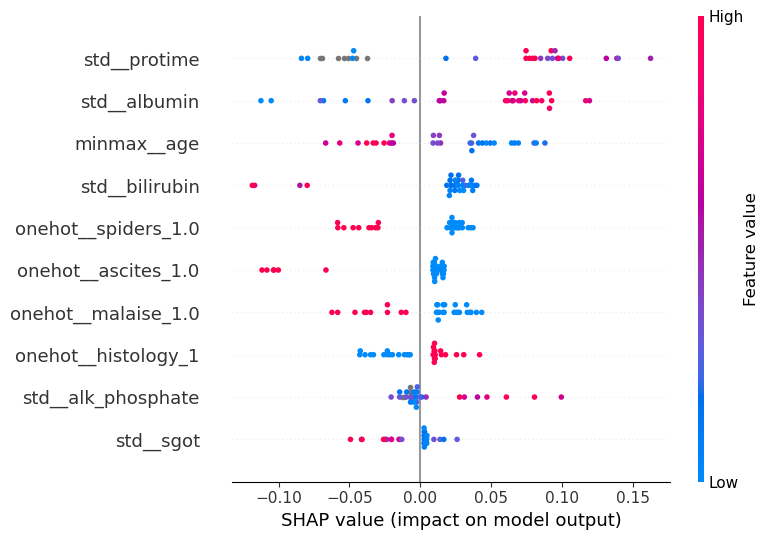

In [19]:
import shap

explainer = shap.Explainer(model,df_train,model_output="probability")

shap_values = explainer(df_test)
shap_sum = np.abs(shap_values.values).mean(axis=0)

top_indices = np.argsort(shap_sum)[-10:]
top_features = np.array(df_test.columns)[top_indices]

# Filter the SHAP values to include only the top 10 features
shap_values_top = shap_values[:, top_features]

# Generate SHAP summary plot for the top 10 features
shap.summary_plot(shap_values_top, feature_names=top_features)

In [140]:
shap.plots.force(shap_values[20],matplotlib=True,text_rotation=30,show = False)
plt.savefig('page14_lower.png', dpi=350,bbox_inches = 'tight')


AttributeError: 'int' object has no attribute 'unique'

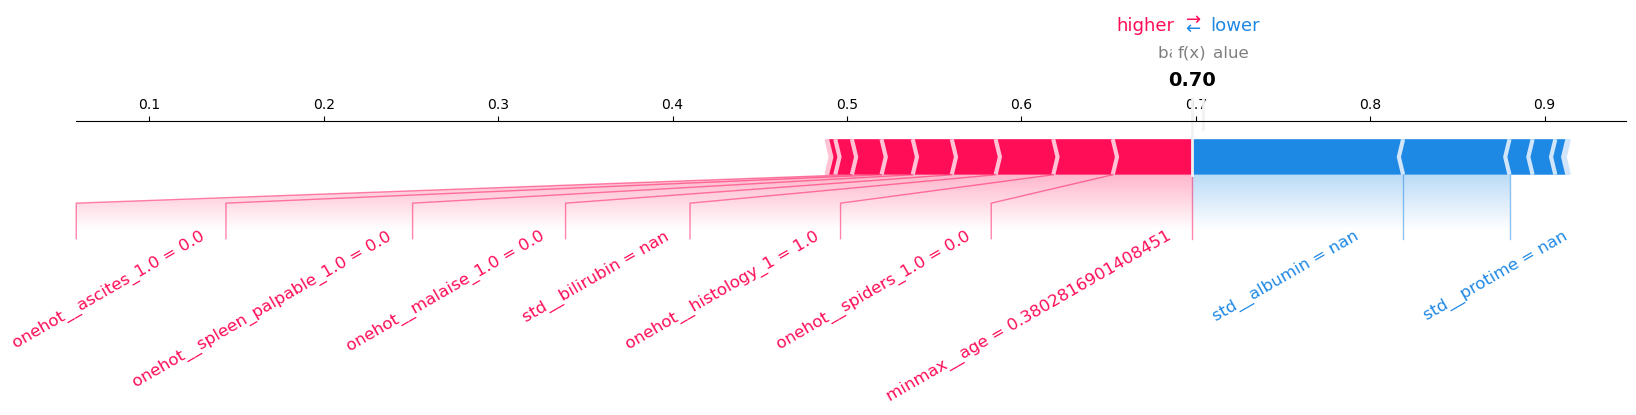

In [81]:
shap.plots.force(shap_values[8],matplotlib=True,text_rotation=30)

In [325]:
X_transformed = preprocessor.fit_transform(df)
feature_names = preprocessor.get_feature_names_out()
imputer = IterativeImputer(estimator = LinearRegression(), random_state=42)
X_impute = imputer.fit_transform(X_transformed)
X_imp = pd.DataFrame(data=X_impute, columns = feature_names)
X_other, X_test, y_other, y_test = train_test_split(X_imp,y_full,train_size = 0.8,random_state = 42*0)


In [61]:
from sklearn.inspection import permutation_importance
result = permutation_importance(model, X_imp, y_full, n_repeats=10,random_state=0,scoring = 'accuracy')
sorted_idx = result.importances_mean.argsort()[-10:]
plt.figure(figsize=(10, 7))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_imp.columns[sorted_idx])
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.xlabel('accuracy')
plt.show()

NameError: name 'model' is not defined

In [21]:
df

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
151,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
152,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
153,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


In [318]:
X_imp

,onehot__sex_1,onehot__sex_2,onehot__steroid_1.0,onehot__steroid_2.0,onehot__steroid_nan,onehot__antivirals_1,onehot__antivirals_2,onehot__fatigue_1.0,onehot__fatigue_2.0,onehot__fatigue_nan,...,onehot__varices_1.0,onehot__varices_2.0,onehot__varices_nan,onehot__histology_1,onehot__histology_2,std__bilirubin,std__alk_phosphate,std__sgot,std__albumin,std__protime
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,-0.353883,-0.396181,-0.759836,0.281486,0.381720
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,-0.436659,0.578415,-0.491240,-0.488722,0.045814
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,-0.602212,-0.181770,-0.603155,0.281486,0.475154
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,-0.602212,-1.156366,-0.379325,0.281486,0.797881
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,-0.353883,-0.027860,1.277017,0.281486,0.378896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,5.109356,0.697747,1.747060,-0.796805,-0.521096
151,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,-0.436659,0.402988,0.627910,0.743611,0.606122
152,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,-0.519435,-0.591100,-0.737453,0.435528,0.152531
153,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.059999,-0.474149,-0.748645,0.435528,-0.609028


In [320]:
X_test

,onehot__sex_1,onehot__sex_2,onehot__steroid_1.0,onehot__steroid_2.0,onehot__steroid_nan,onehot__antivirals_1,onehot__antivirals_2,onehot__fatigue_1.0,onehot__fatigue_2.0,onehot__fatigue_nan,...,onehot__varices_1.0,onehot__varices_2.0,onehot__varices_nan,onehot__histology_1,onehot__histology_2,std__bilirubin,std__alk_phosphate,std__sgot,std__albumin,std__protime
120,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.218868,-0.298721,0.751016,0.281486,0.009968
102,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.804986,1.221648,1.579187,-1.258930,0.182359
148,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,-0.436659,-0.318213,0.739825,0.281486,-0.003739
142,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,-0.353883,1.176273,-0.737453,-1.258930,0.050461
22,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,-0.353883,-0.396181,-0.737453,0.281486,1.677199
119,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.467197,-0.396181,-0.647921,-0.026597,0.526382
154,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,-0.188330,-0.103802,-0.748645,-1.104888,-0.872823
84,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,-0.105554,0.695367,0.784591,0.127444,-0.169369
80,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,-0.519435,-0.655806,-0.804602,1.513819,0.973704
68,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,-0.353883,-1.390269,-0.793411,0.281486,-0.345232


In [350]:
models_xgb

[GridSearchCV(cv=KFold(n_splits=4, random_state=0, shuffle=True),
              estimator=Pipeline(steps=[('xgbclassifier',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                                       eval_metric=None,
                                                       feature_types=None,
                                                       gamma=None, gpu_id=None,
                                     

In [65]:
len(shap_values)

31

In [110]:
df_total.columns

Index(['onehot__sex_1', 'onehot__sex_2', 'onehot__steroid_1.0',
       'onehot__steroid_2.0', 'onehot__steroid_nan', 'onehot__antivirals_1',
       'onehot__antivirals_2', 'onehot__fatigue_1.0', 'onehot__fatigue_2.0',
       'onehot__fatigue_nan', 'onehot__malaise_1.0', 'onehot__malaise_2.0',
       'onehot__malaise_nan', 'onehot__anorexia_1.0', 'onehot__anorexia_2.0',
       'onehot__anorexia_nan', 'onehot__liver_big_1.0',
       'onehot__liver_big_2.0', 'onehot__liver_big_nan',
       'onehot__liver_firm_1.0', 'onehot__liver_firm_2.0',
       'onehot__liver_firm_nan', 'onehot__spleen_palpable_1.0',
       'onehot__spleen_palpable_2.0', 'onehot__spleen_palpable_nan',
       'onehot__spiders_1.0', 'onehot__spiders_2.0', 'onehot__spiders_nan',
       'onehot__ascites_1.0', 'onehot__ascites_2.0', 'onehot__ascites_nan',
       'onehot__varices_1.0', 'onehot__varices_2.0', 'onehot__varices_nan',
       'onehot__histology_1', 'onehot__histology_2', 'std__bilirubin',
       'std__alk_phospha

In [114]:
model.predict(df_total)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0])

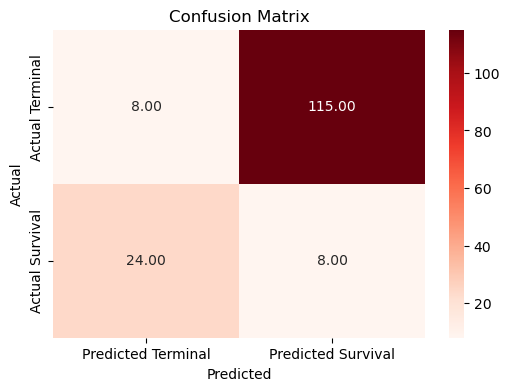

In [210]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have a trained model and test data
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_full, model.predict(df_total))

# Optionally convert to DataFrame for labeling in Seaborn heatmap
cm_df = pd.DataFrame(cm, index=["Actual Terminal", "Actual Survival"], 
                     columns=["Predicted Terminal", "Predicted Survival"])

# Plotting using Seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Reds')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('page11.png', dpi=350)
plt.show()

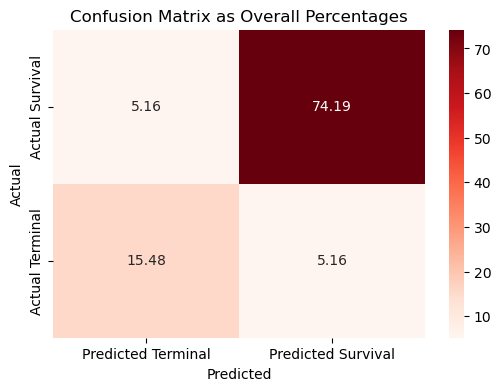

In [214]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have a trained model and test data
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_full, model.predict(df_total))

# Convert to DataFrame
cm_df = pd.DataFrame(cm, index=["Actual Survival","Actual Terminal"], 
                     columns=["Predicted Terminal", "Predicted Survival"])

# Convert raw counts to overall percentages
cm_df_percent = cm_df / cm_df.sum().sum() * 100

# Plotting using Seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm_df_percent, annot=True, fmt='.2f', cmap='Reds')
plt.title('Confusion Matrix as Overall Percentages')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('page11_overall_percent.png', dpi=300)
plt.show()


In [120]:
shap_values[0]

.values =
array([ 0.        ,  0.        ,  0.00548693,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.03586929,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.00121676,  0.        ,  0.        ,  0.        ,
        0.00073697,  0.        ,  0.01073767,  0.        ,  0.        ,
        0.02773989, -0.00066356,  0.        ,  0.0147877 ,  0.        ,
        0.        ,  0.00798344,  0.        ,  0.        ,  0.02566492,
        0.        ,  0.03003563, -0.00664692,  0.00392903,  0.08583705,
       -0.03732227, -0.03777806])

.base_values =
0.7043503973113234

.data =
array([ 1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  1

In [165]:
y_full
y_baseline = [1] * 155

In [162]:
len(y_baseline)

155

In [166]:
f1_score(y_full,y_baseline)

0.3422459893048128